In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Import data
df = pd.read_csv("June_MERGED_SDOH_PLUS_UTIL.xlsx - Sheet1.csv")

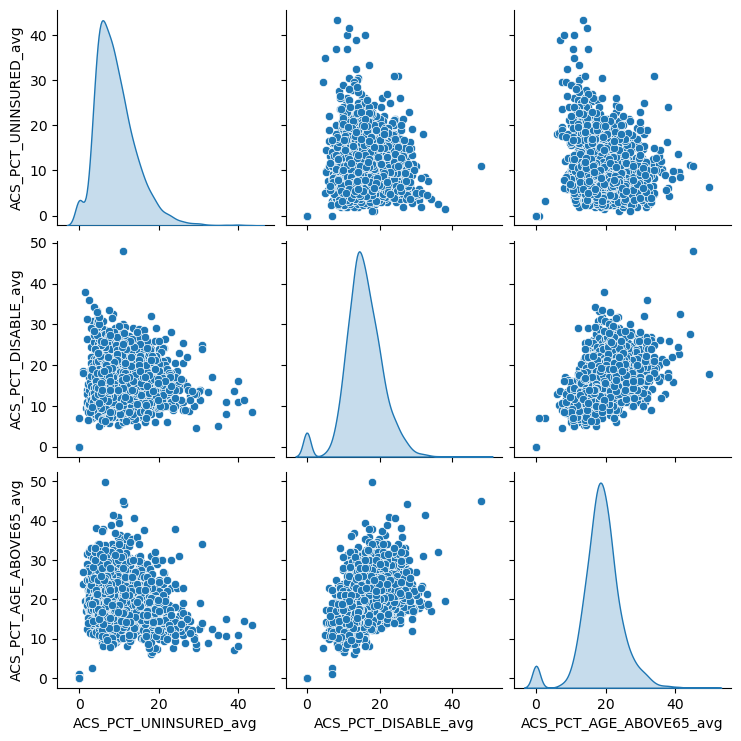

In [5]:
# Pairplot
sns.pairplot(df[['ACS_PCT_UNINSURED_avg', 'ACS_PCT_DISABLE_avg', 'ACS_PCT_AGE_ABOVE65_avg']], diag_kind="kde")

# Save plot
# plt.savefig("pairplot.png", bbox_inches='tight', dpi=300)

plt.show()

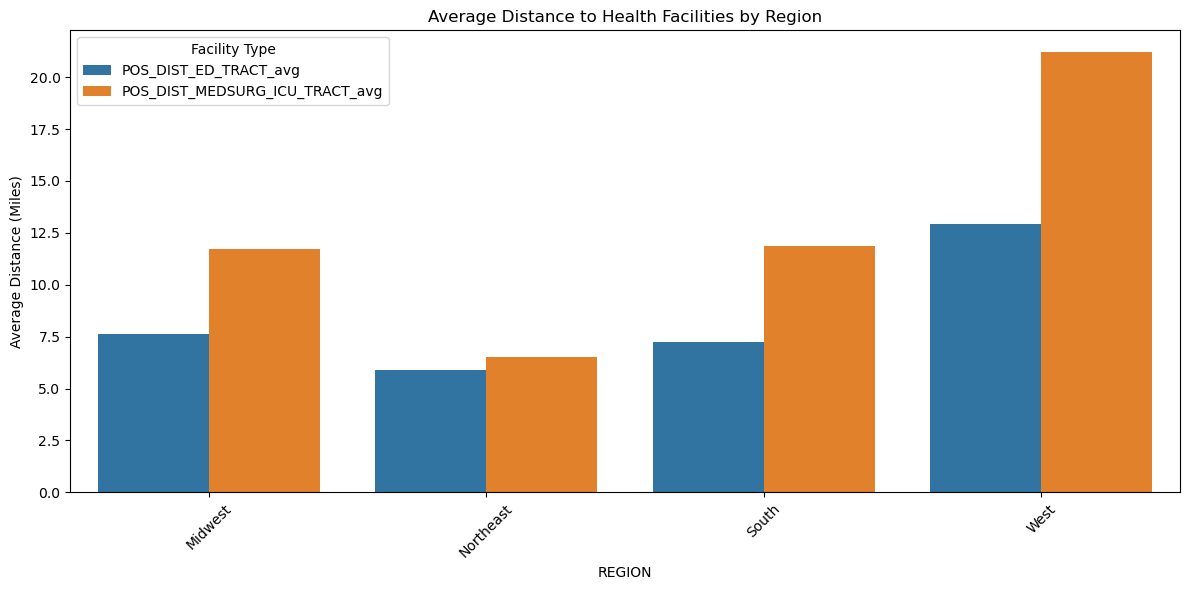

In [27]:
# Bar chart
dist_by_region = df.groupby('REGION')[[
    'POS_DIST_ED_TRACT_avg',
    'POS_DIST_MEDSURG_ICU_TRACT_avg'
]].mean().reset_index()

# Melt for multi-bar plot
df_melt = dist_by_region.melt(id_vars='REGION', var_name='Facility Type', value_name='Avg Distance')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='REGION', y='Avg Distance', hue='Facility Type')
plt.title('Average Distance to Health Facilities by Region')
plt.ylabel("Average Distance (Miles)") 
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
# plt.savefig("avg_distance.png", bbox_inches='tight', dpi=300)

plt.show()

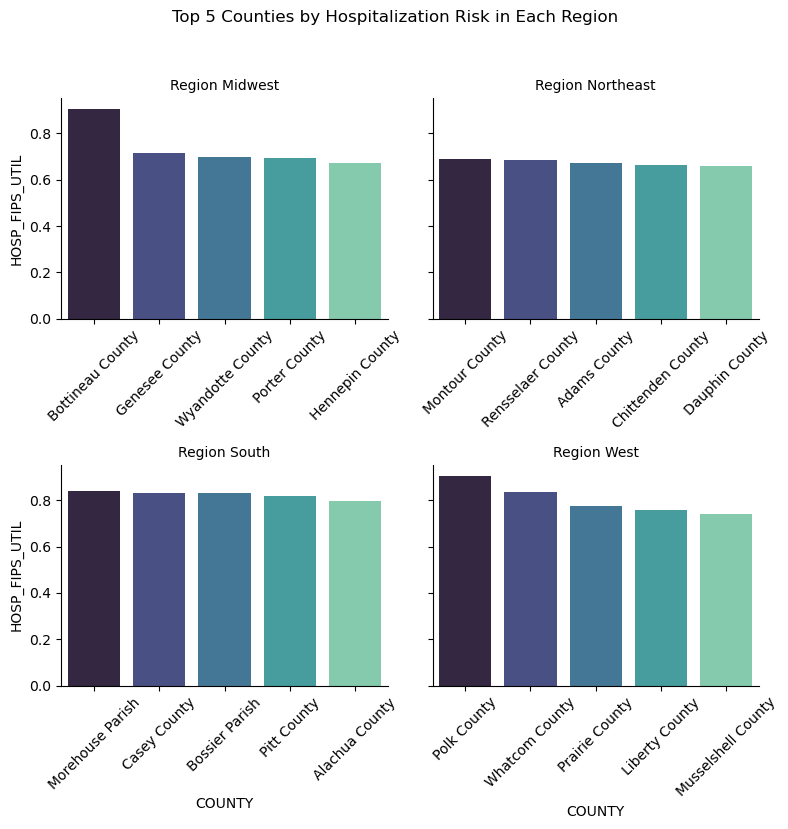

In [33]:
# Multi bar chart
# Group by Region and County
risk_by_region_county = df.groupby(['REGION', 'COUNTY'])['HOSP_FIPS_UTIL'].mean().reset_index()

# limit to top N counties per region
top_county = (
    risk_by_region_county
    .sort_values(['REGION', 'HOSP_FIPS_UTIL'], ascending=[True, False])
    .groupby('REGION')
    .head(5)  # top 5 per region
)

g = sns.FacetGrid(top_county, col='REGION', col_wrap=2, height=4, sharex=False)
g.map_dataframe(
    sns.barplot,
    x='COUNTY',
    y='HOSP_FIPS_UTIL',
    hue='COUNTY',
    palette='mako',
    legend=False 
)
g.set_xticklabels(rotation=45)
g.set_titles("Region {col_name}")
g.fig.suptitle("Top 5 Counties by Hospitalization Risk in Each Region", y=1.03)
plt.tight_layout()

# Save the plot
#plt.savefig("util_risk_region_county.png", bbox_inches='tight', dpi=300)

plt.show()
